In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

In [5]:
classes_shp = gpd.read_file('merged_derelict_vacant_final.dbf')
classes_df = pd.DataFrame(classes_shp)

In [14]:
clipped_pred = pd.read_csv('clipped_predictions.csv').drop(columns='Unnamed: 0')

In [15]:
clipped_pred.head()

,class_id,polygon_id
0,2,92
1,0,92
2,0,92
3,0,92
4,0,92


In [18]:
class_id_to_string = {
    0: 'vegetation',
    1: 'concrete',
    2: 'bare soil',
    3: 'water',
    4: 'buildings'
}

clipped_pred['class_name'] = clipped_pred.class_id.apply(lambda id: class_id_to_string[id])

In [23]:
pred_metadata = clipped_pred.merge(classes_df, how='left', left_on='polygon_id', right_index=True)
pred_metadata.drop(columns=['path', 'layer', 'datazone'], inplace=True)

In [25]:
pred_metadata.head()

,class_id,polygon_id,class_name,local_auth,site_code,site_name,address,east,north,site_size,site_type,location,owner_1,owner_2,period,previous_u,developmen,geometry
0,2,92,bare soil,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
1,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
2,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
3,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."
4,0,92,vegetation,Glasgow City,3617,None,BALMORE ROAD,258212,669911,0.12,Derelict,Site in settlement with population equal to or...,Public: Local Authority,Not applicable (i.e. only one owner),2001-2004,Manufacturing,Uneconomic to Develop/Soft End Use,"POLYGON ((258218.415 669946.129, 258218.415 66..."


In [27]:
pred_metadata.to_pickle('pred_metadata.pckl')

In [80]:
df_vacant = pred_metadata[pred_metadata['site_type'] == 'Vacant Land']
df_derelict = pred_metadata[pred_metadata['site_type'] == 'Derelict']

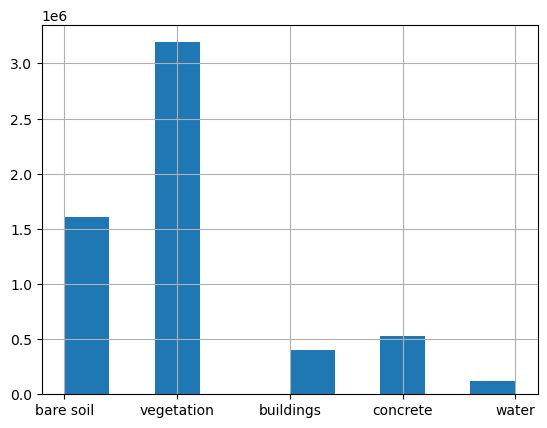

In [60]:
pred_metadata['class_name'].hist()

Text(0, 0.5, 'Percentage')

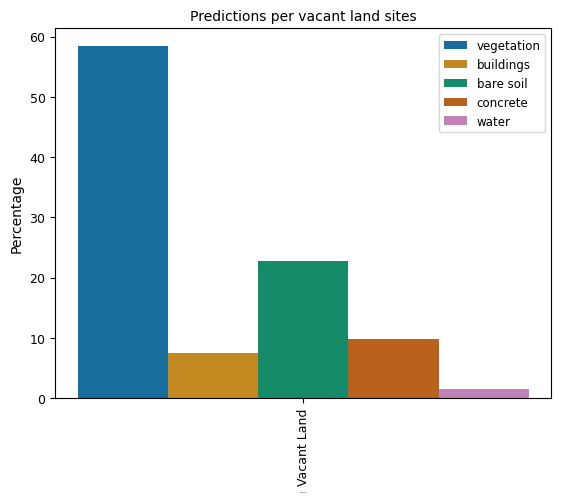

In [84]:
#classes_df = classes_df.replace({'developmen':'Unknown (uncertain/insufficient information)'}, 'Unknown')
#classes_df = classes_df.replace({'developmen':'Uneconomic to Develop/Soft End Use'}, 'Uneconomic to Develop')
plt.style.use('default')
grouped = df_vacant.groupby(['class_name'], sort=False)
site_type_counts = grouped['site_type'].value_counts(normalize=False, sort=False)


site_type_data = [
    {'site_type': site_type, 'class_name': class_name, 'percentage': percentage/len(df_vacant)*100} for 
    (class_name, site_type), percentage in dict(site_type_counts).items()
]

df_site = pd.DataFrame(site_type_data)

p = sns.barplot(x='site_type', y="percentage", hue="class_name", data=df_site, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 

plt.legend(prop={'size': 8.5})
plt.title('Predictions per vacant land sites', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)
#plt.savefig('previous use.png')

In [85]:
df_site

,site_type,class_name,percentage
0,Vacant Land,vegetation,58.412121
1,Vacant Land,buildings,7.565642
2,Vacant Land,bare soil,22.695495
3,Vacant Land,concrete,9.829784
4,Vacant Land,water,1.496958


Text(0, 0.5, 'Percentage')

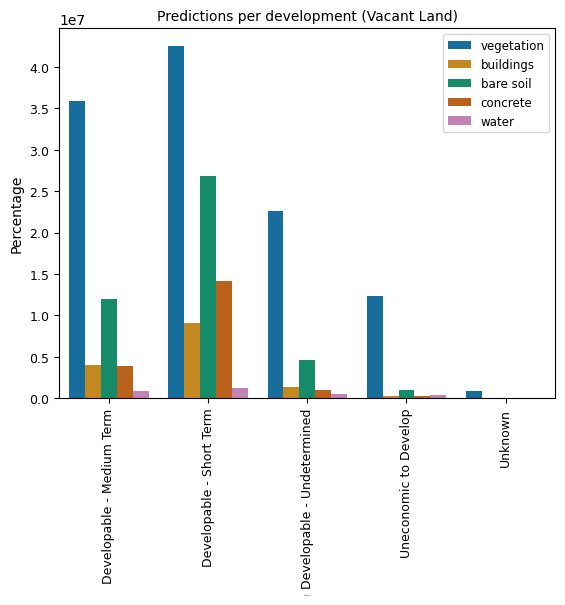

In [108]:
df_vacant = df_vacant.replace({'developmen':'Unknown (uncertain/insufficient information)'}, 'Unknown')
df_vacant = df_vacant.replace({'developmen':'Uneconomic to Develop/Soft End Use'}, 'Uneconomic to Develop')

grouped = df_vacant.groupby(['class_name'], sort=False)
development_counts = grouped['developmen'].value_counts(normalize=False, sort=False)

development_data = [
    {'developmen': developmen, 'class_name': class_name, 'percentage': percentage*100} for 
    (class_name, developmen), percentage in dict(development_counts).items()
]

df_development = pd.DataFrame(development_data)

p = sns.barplot(x='developmen', y="percentage", hue="class_name", data=df_development, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 
plt.legend(prop={'size': 8.5})
plt.title('Predictions per development (Vacant Land)', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)


Text(0, 0.5, 'Percentage')

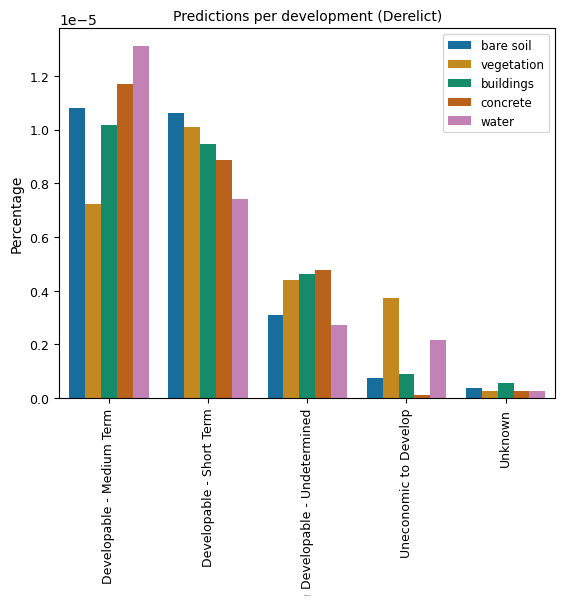

In [76]:
df_derelict = df_derelict.replace({'developmen':'Unknown (uncertain/insufficient information)'}, 'Unknown')
df_derelict = df_derelict.replace({'developmen':'Uneconomic to Develop/Soft End Use'}, 'Uneconomic to Develop')

grouped = df_derelict.groupby(['class_name'], sort=False)
developmen_counts = grouped['developmen'].value_counts(normalize=True, sort=False)

developmen_data = [
    {'developmen': developmen, 'class_name': class_name, 'percentage': (percentage/len(df_derelict)*100)} for 
    (class_name, developmen), percentage in dict(developmen_counts).items()
]
df_developmen = pd.DataFrame(developmen_data)

p = sns.barplot(x='developmen', y="percentage", hue="class_name", data=df_developmen, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 

plt.legend(prop={'size': 8.5})
plt.title('Predictions per development (Derelict)', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)

Text(0, 0.5, 'Percentage')

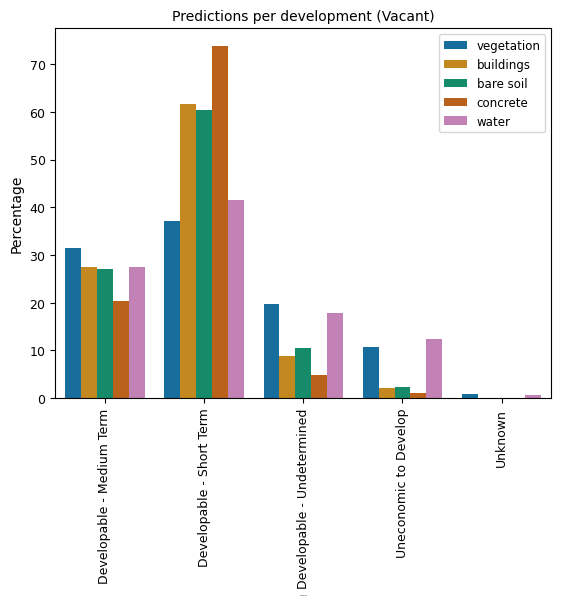

In [57]:
df_vacant = df_vacant.replace({'developmen':'Unknown (uncertain/insufficient information)'}, 'Unknown')
df_vacant = df_vacant.replace({'developmen':'Uneconomic to Develop/Soft End Use'}, 'Uneconomic to Develop')

grouped = df_vacant.groupby(['class_name'], sort=False)
developmen_counts = grouped['developmen'].value_counts(normalize=True, sort=False)

developmen_data = [
    {'developmen': developmen, 'class_name': class_name, 'percentage': percentage*100} for 
    (class_name, developmen), percentage in dict(developmen_counts).items()
]

df_developmen = pd.DataFrame(developmen_data)

p = sns.barplot(x='developmen', y="percentage", hue="class_name", data=df_developmen, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 

plt.legend(prop={'size': 8.5})
plt.title('Predictions per development (Vacant)', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)

Text(0, 0.5, 'Percentage')

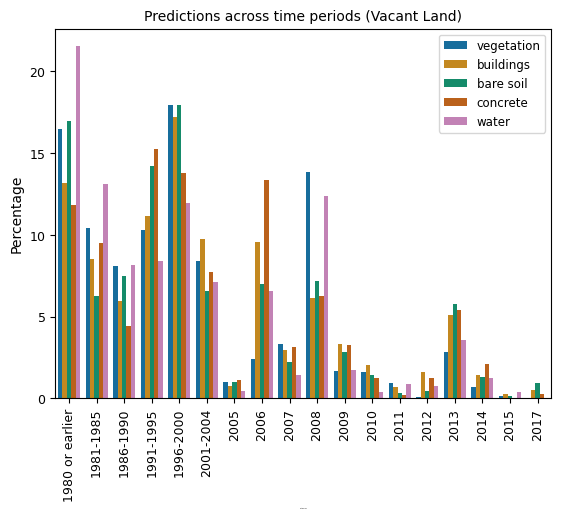

In [58]:
grouped = df_vacant.groupby(['class_name'], sort=False)
period_counts = grouped['period'].value_counts(normalize=True, sort=False)

period_data = [
    {'period': period, 'class_name': class_name, 'percentage': percentage*100} for 
    (class_name, period), percentage in dict(period_counts).items()
]

df_period = pd.DataFrame(period_data)

p = sns.barplot(x='period', y="percentage", hue="class_name", data=df_period, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 

plt.legend(prop={'size': 8.5})
plt.title('Predictions across time periods (Vacant Land)', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)

In [ ]:
grouped = df_vacant.groupby(['class_name'], sort=False)
period_counts = grouped['period'].value_counts(normalize=True, sort=False)

period_data = [
    {'period': period, 'class_name': class_name, 'percentage': percentage*100} for 
    (class_name, period), percentage in dict(period_counts).items()
]

df_period = pd.DataFrame(period_data)

p = sns.barplot(x='period', y="percentage", hue="class_name", data=df_period, palette='colorblind')
plt.setp(p.get_xticklabels(), rotation=90, fontsize=9) 
plt.setp(p.get_yticklabels(), fontsize=9) 

plt.legend(prop={'size': 8.5})
plt.title('Predictions across time periods (Vacant Land)', fontsize=10)
plt.xlabel('Categories', fontsize=0)
plt.ylabel('Percentage', fontsize=10)